In [ ]:
import numpy as np

In [ ]:
x = np.array([[33,1,5],[45,3,1],[6,83,4]])
x

array([[33,  1,  5],
       [45,  3,  1],
       [ 6, 83,  4]])

In [ ]:
np.linalg.eig(x)[1]

array([[-0.36046418+0.j        , -0.1021708 -0.05877383j,
        -0.1021708 +0.05877383j],
       [-0.39866584+0.j        , -0.07291456+0.21953968j,
        -0.07291456-0.21953968j],
       [-0.8432859 +0.j        ,  0.96570832+0.j        ,
         0.96570832-0.j        ]])

In [ ]:
y = x*10
np.linalg.eig(y)[1]

array([[-0.36046418+0.j        , -0.1021708 -0.05877383j,
        -0.1021708 +0.05877383j],
       [-0.39866584+0.j        , -0.07291456+0.21953968j,
        -0.07291456-0.21953968j],
       [-0.8432859 +0.j        ,  0.96570832+0.j        ,
         0.96570832-0.j        ]])

## PCA with Eigen Vector Approach

In [ ]:
import numpy as np

In [ ]:
def pca(data, target_dimension):

  # step 1: standardize data
  data_s = (data - np.mean(data)) / np.std(data)

  # step 2: calculate covariance matrix
  cov_matrix = np.cov(data_s, rowvar=False)

  # step3 : compute eigen values and vectors
  eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

  # step 4: reduction
  sorted_index = np.argsort(eigenvalues)
  sorted_EVal = eigenvalues[sorted_index]
  sorted_Evec = eigenvectors[:,sorted_index]

  # step 5: reduced Eigen Vectors
  REV = sorted_Evec[:, :target_dimension]

  # step 6: Reduced data
  data_new = np.dot(REV.transpose(),data_s.transpose()).transpose()

  return data_new

In [ ]:
x = np.array([[3, 4, 6, 7, 8, 3, 1, 4, 6, 12, 12, 3, 6, 8, 90],
              [12, 3, 5, 7, 8, 4, 2, 4, 12, 34, 56 ,76, 5, 3, 5]]).T
x.shape

(15, 2)

In [ ]:
target_dimension = 1
out_data = pca(x,target_dimension = target_dimension)
out_data.shape

(15, 1)

In [ ]:
out_data

array([[ 0.42200413],
       [ 0.66612611],
       [ 0.53426709],
       [ 0.43733243],
       [ 0.37140292],
       [ 0.67004532],
       [ 0.80190435],
       [ 0.63512096],
       [ 0.31723105],
       [-0.57442841],
       [-1.25654168],
       [-1.56232539],
       [ 0.53426709],
       [ 0.52642866],
       [-2.39937938]])

In [ ]:
eval,evec = np.linalg.eig(np.cov(x,rowvar=False))

In [ ]:
eval

array([442.14939119, 530.89822786])

In [ ]:
evec

array([[-0.74782096,  0.66390045],
       [-0.66390045, -0.74782096]])

In [ ]:
sorted_index = [0,1]
sorted_eval = eval[sorted_index]
sorted_eval

array([442.14939119, 530.89822786])

In [ ]:
sorted_vectors = evec[:,sorted_index]
sorted_vectors

array([[-0.74782096,  0.66390045],
       [-0.66390045, -0.74782096]])

In [ ]:
sorted_vectors[:,:1]

array([[-0.74782096],
       [-0.66390045]])

# PCA with Scikit-learn

In [ ]:
x = np.array([[3, 4, 6, 7, 8, 3, 1, 4, 6, 12, 12, 3, 6, 8, 90],
              [12, 3, 5, 7, 8, 4, 2, 4, 12, 34, 56 ,76, 5, 3, 5]]).T
x.shape

(15, 2)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

outData = pca.fit_transform(x)
outData.shape

(15, 1)

In [ ]:
pca.explained_variance_ratio_

array([0.54560354])

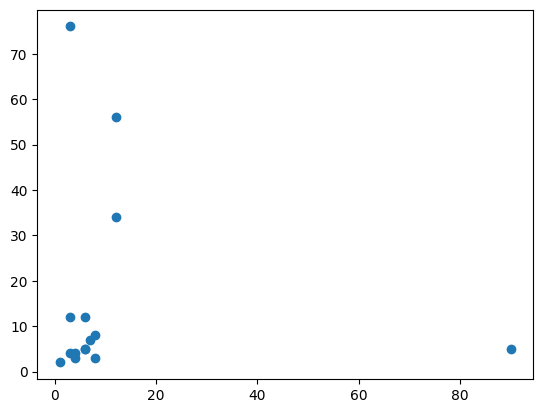

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1])
plt.show()

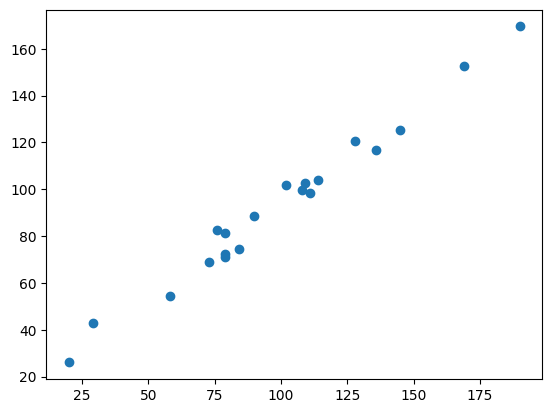

In [ ]:
x1 = np.random.randint(10,200,20)
x2 = 0.85*x1 + np.random.randint(1,20,20)

plt.scatter(x1,x2)
plt.show()

In [ ]:
data = np.concatenate([[x1],[x2]]).T
data.shape

(20, 2)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

outData = pca.fit_transform(data)
outData.shape

(20, 1)

In [ ]:
pca.explained_variance_ratio_

array([0.99534452])

In [ ]:
eval = [4.6, 5.7, 2.1, -0.5, 0.9]
np.argsort(eval)

array([3, 4, 2, 0, 1])